<a href="https://colab.research.google.com/github/diegosfc91/EJERCICIOS-DE-CORE-Machine-Learning/blob/main/Clasificaci%C3%B3n_utilizando_LightGBM_(LGBM)_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Carga y Exploración Inicial de Datos

Estructura del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

Primeras filas del Dataset:
    Loan_ID Gender Married Dependents     Education Se

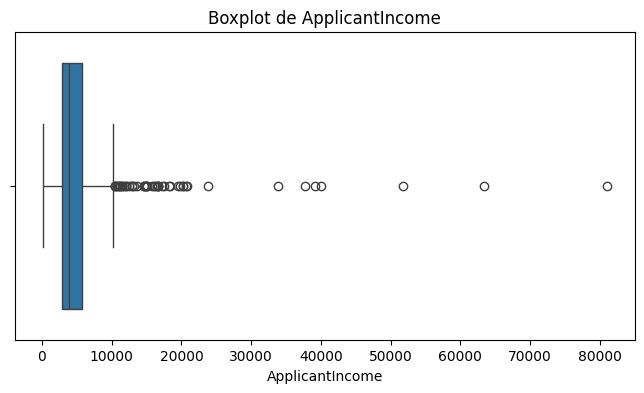

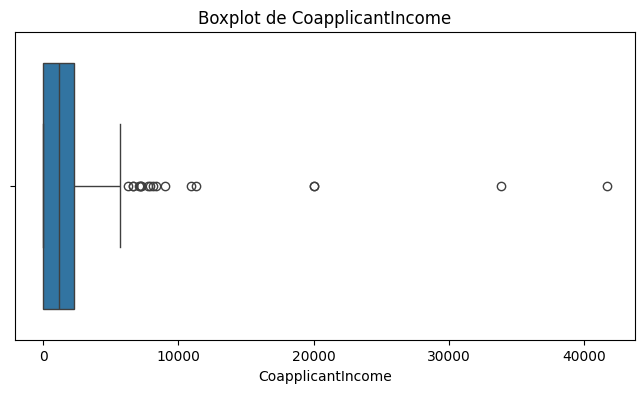

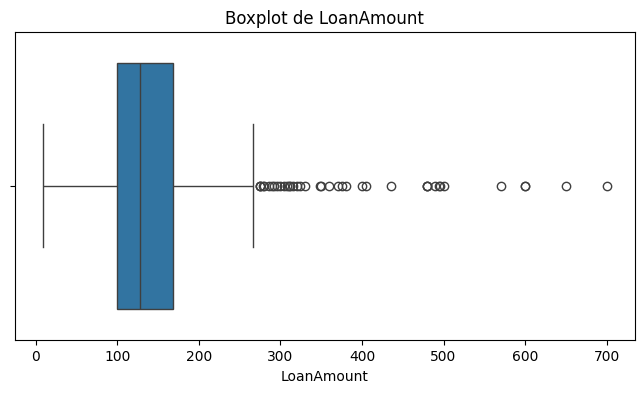

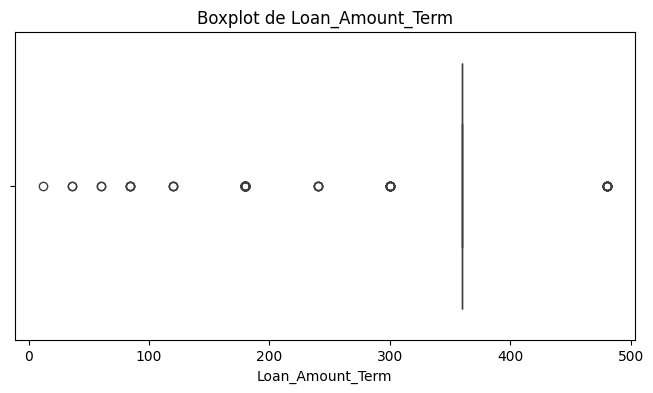

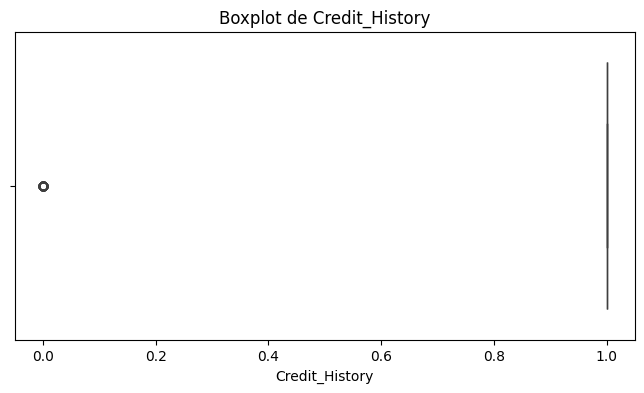


Resumen de Outliers:
ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 39 outliers
Loan_Amount_Term: 88 outliers
Credit_History: 89 outliers


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Cargar el dataset
file_path = '/content/train.csv'  # Cambia esto a la ruta de tu archivo
dataset = pd.read_csv(file_path)

# 2. Exploración inicial
print("Estructura del Dataset:")
print(dataset.info())  # Información general del dataset

print("\nPrimeras filas del Dataset:")
print(dataset.head())  # Primeras 5 filas para un vistazo inicial

# 3. Describir las variables y su distribución
print("\nDescripción Estadística de las Variables Numéricas:")
print(dataset.describe())  # Resumen estadístico de variables numéricas

print("\nDescripción Estadística de las Variables Categóricas:")
print(dataset.describe(include='object'))  # Resumen estadístico de variables categóricas

# 4. Identificar y documentar valores faltantes
print("\nValores Faltantes por Columna:")
missing_values = dataset.isnull().sum()
print(missing_values)

# 5. Identificar y documentar outliers
# Identificación de outliers usando boxplots
for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=dataset[column])
    plt.title(f"Boxplot de {column}")
    plt.show()

# Resumen de outliers
print("\nResumen de Outliers:")
for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")



# Parte 2: Análisis Exploratorio de Datos (EDA)

Estadísticas Descriptivas Básicas (Variables Numéricas):
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000             614.0   
mean       4617.111564        1419.702231  137.365635             360.0   
std        2479.851729        1624.605892   55.779749               0.0   
min         150.000000           0.000000    9.000000             360.0   
25%        2877.500000           0.000000  100.250000             360.0   
50%        3812.500000        1188.500000  128.000000             360.0   
75%        5795.000000        2297.250000  164.750000             360.0   
max       10171.250000        5743.125000  261.500000             360.0   

       Credit_History  
count           614.0  
mean              1.0  
std               0.0  
min               1.0  
25%               1.0  
50%               1.0  
75%               1.0  
max               1.0  

Estadísticas Descriptivas (Variables Categóricas):

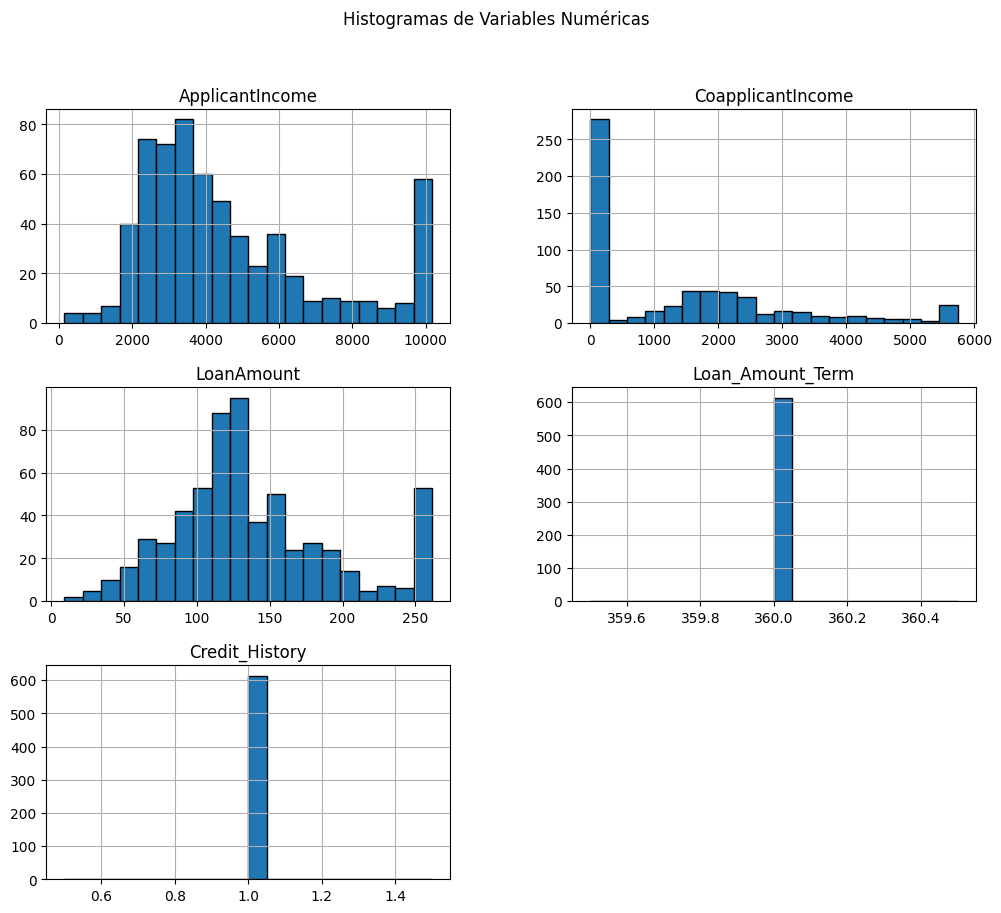

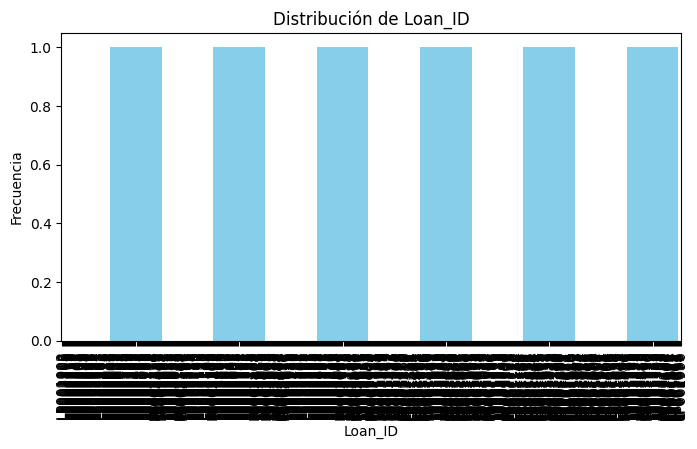

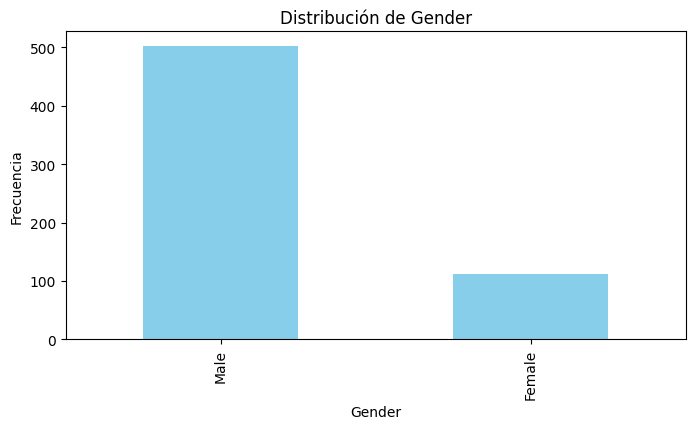

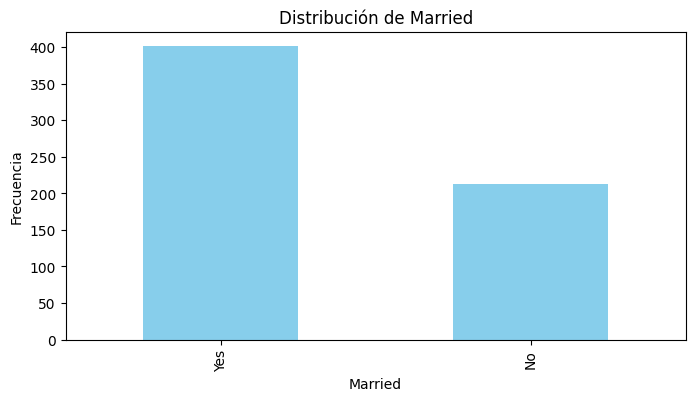

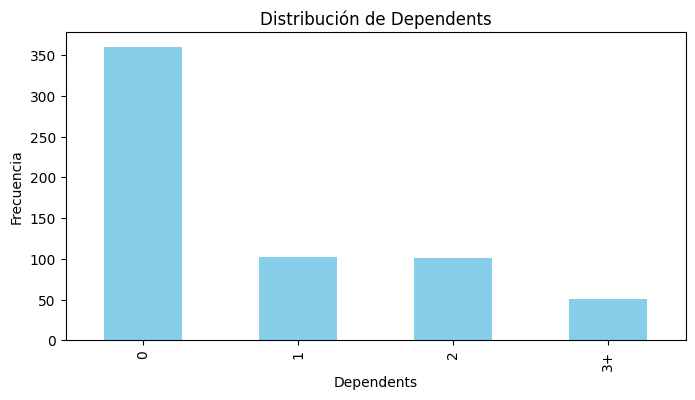

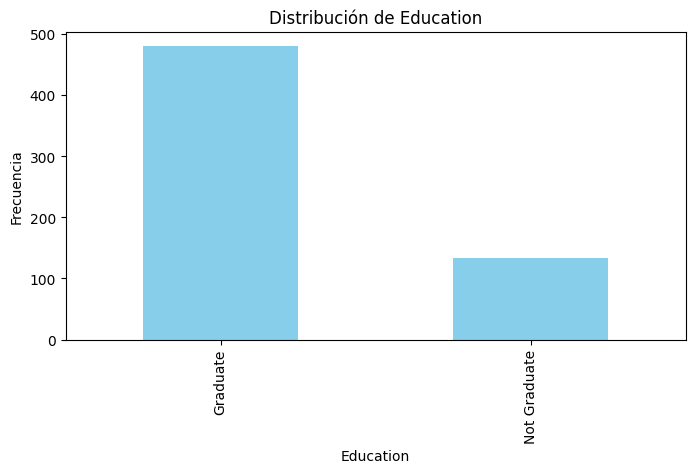

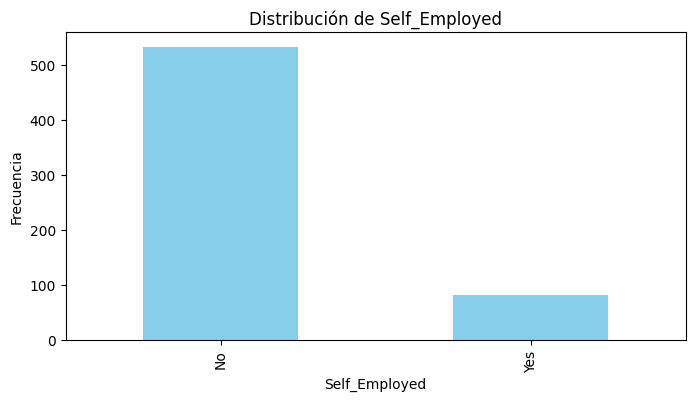

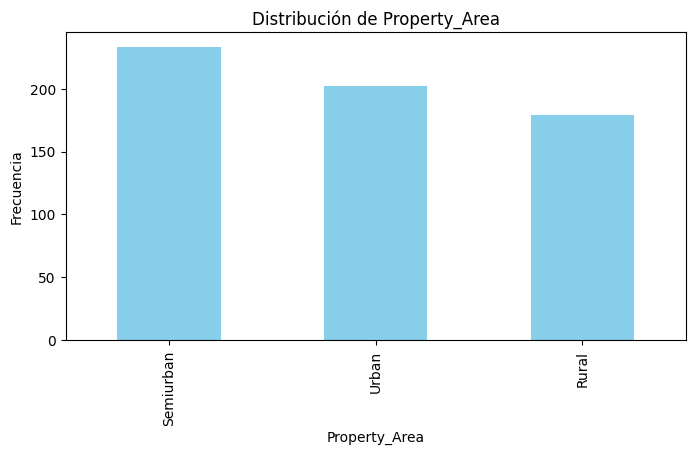

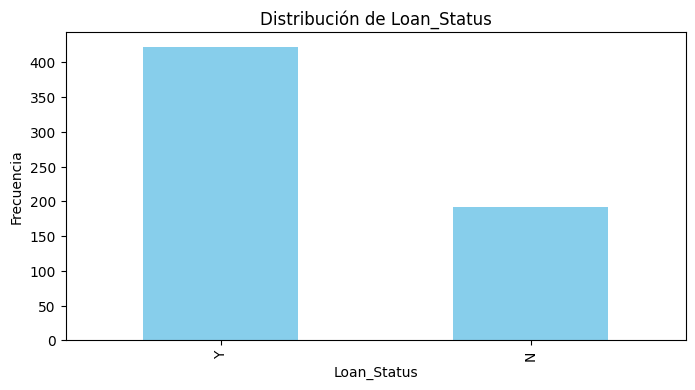

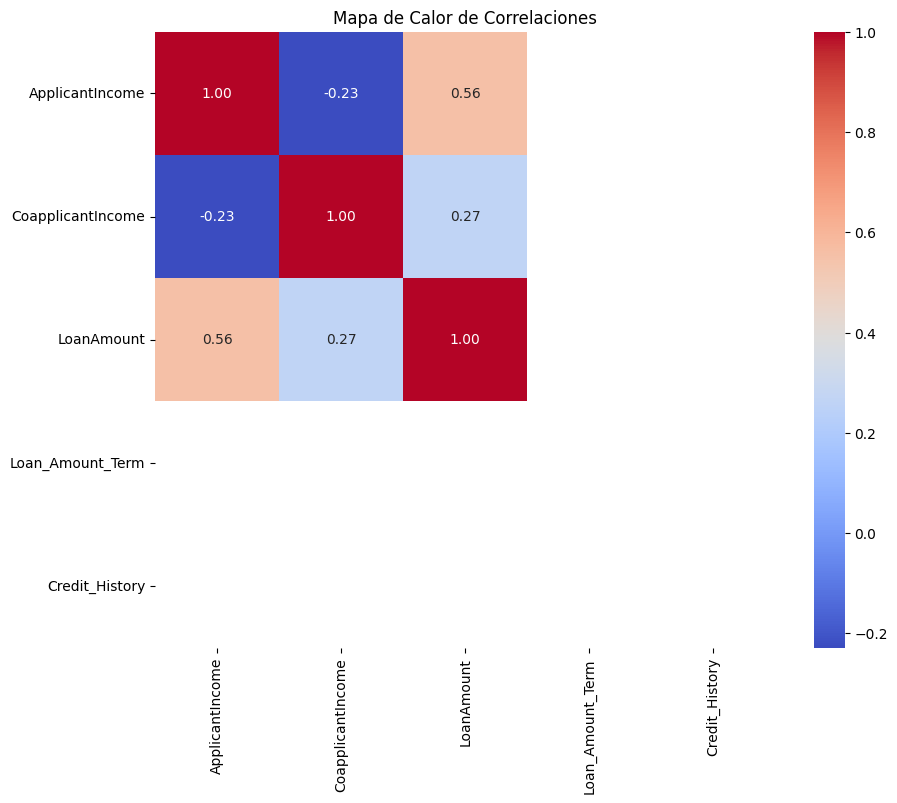

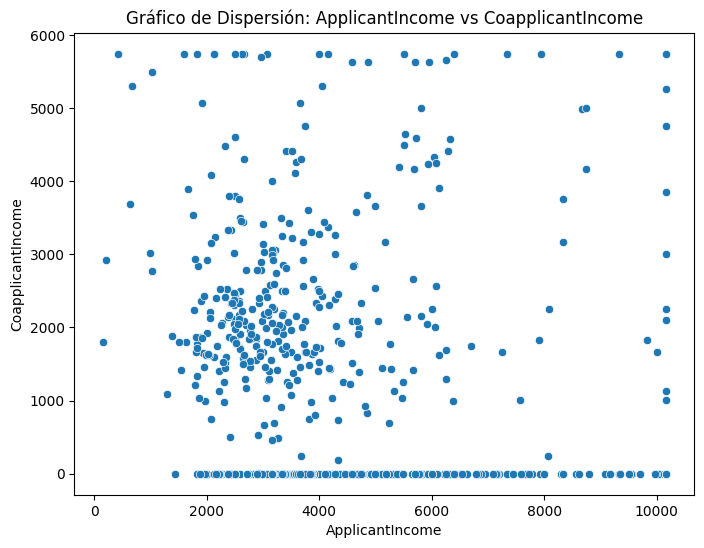

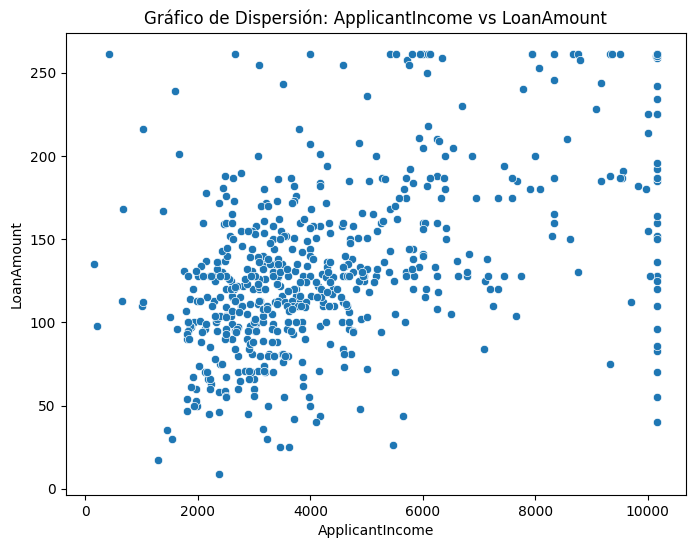

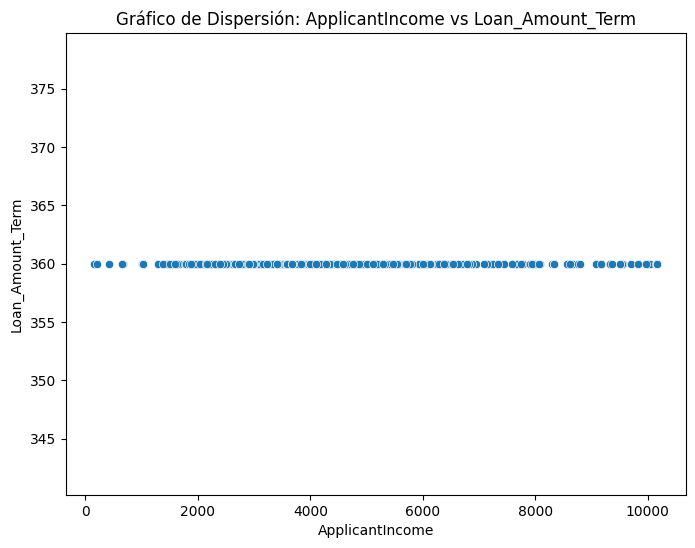

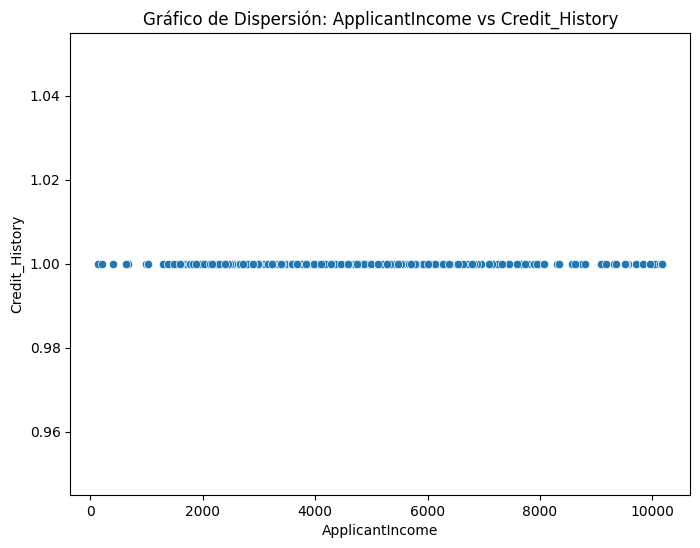

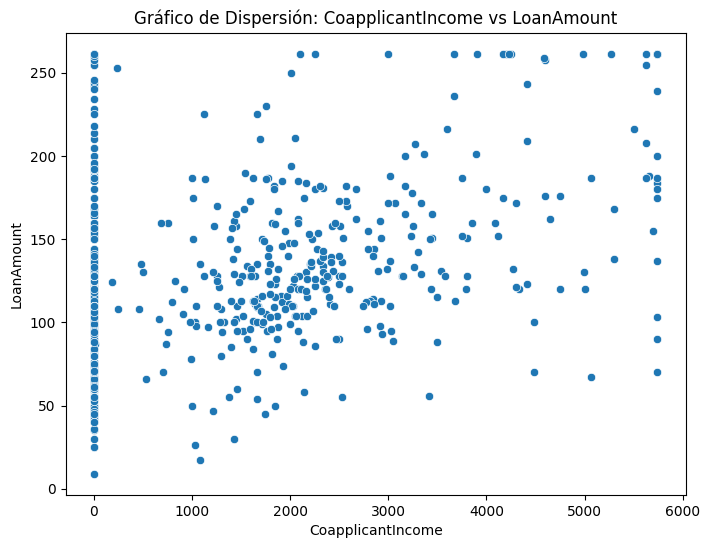

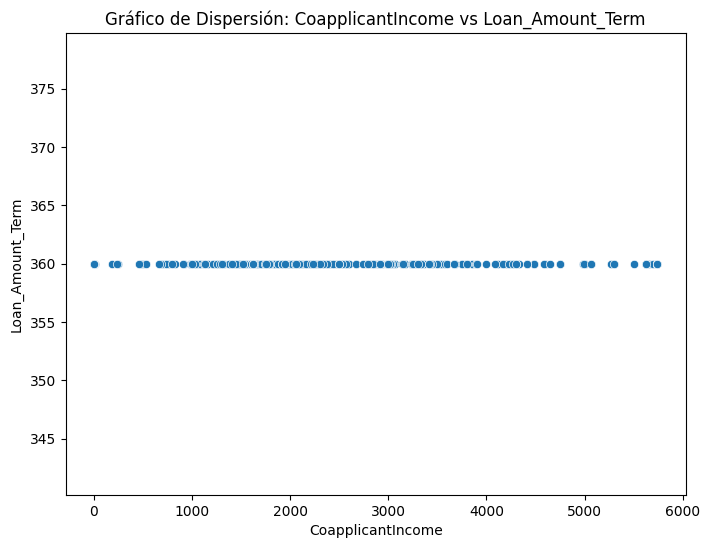

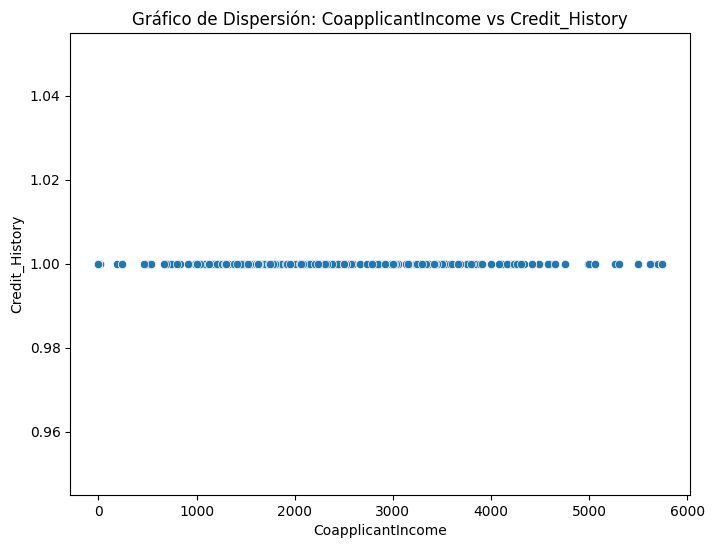

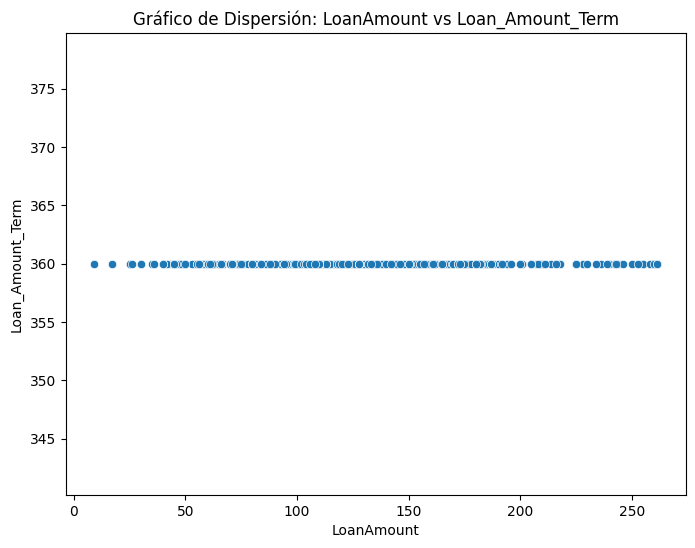

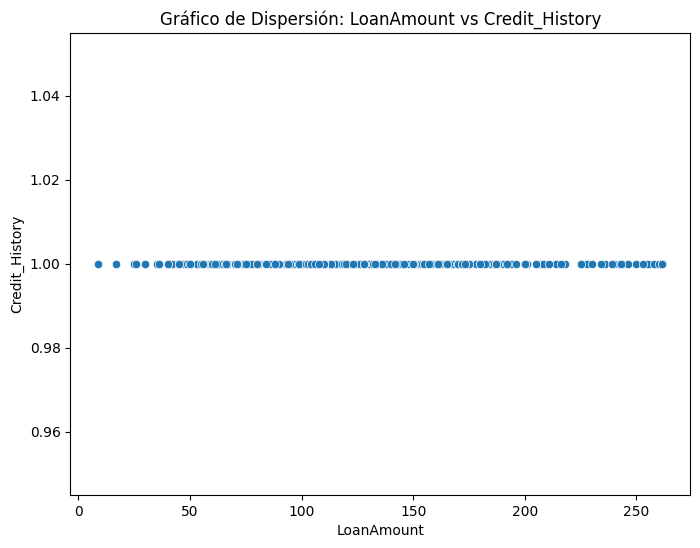

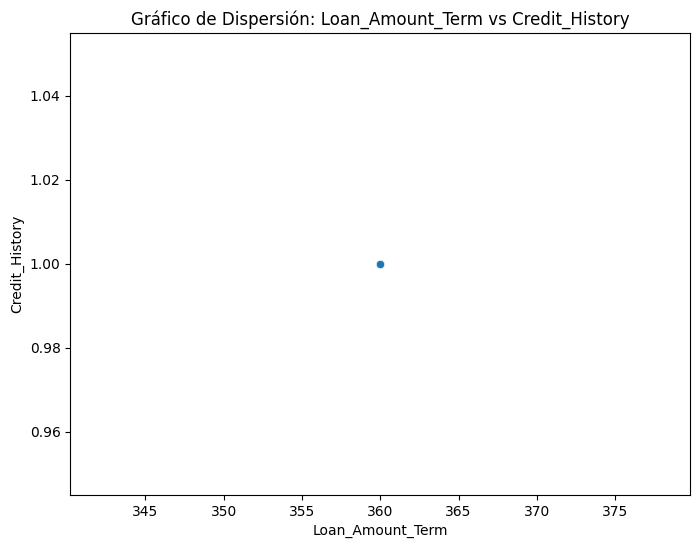


Valores Faltantes por Columna:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Valores Faltantes después del Tratamiento:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Resumen de Outliers:
ApplicantIncome: 0 outliers
CoapplicantIncome: 0 outliers
LoanAmount: 0 outliers
Loan_Amount_Term: 0 outliers
Credit_History: 0 outliers

Datos tratados, listos para el análisis.


In [5]:

# 1. Análisis Estadístico Descriptivo
print("Estadísticas Descriptivas Básicas (Variables Numéricas):")
print(dataset.describe())

print("\nEstadísticas Descriptivas (Variables Categóricas):")
print(dataset.describe(include='object'))

# Distribución de las variables categóricas
print("\nDistribución de Variables Categóricas:")
for column in dataset.select_dtypes(include=['object']).columns:
    print(f"\n{column}:")
    print(dataset[column].value_counts())

# 2. Visualizaciones

# Histogramas para variables numéricas
dataset.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Histogramas de Variables Numéricas")
plt.show()

# Gráficos de barras para variables categóricas
for column in dataset.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    dataset[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
    plt.show()

# Mapa de calor para correlaciones
plt.figure(figsize=(10, 8))

# Seleccionar únicamente columnas numéricas para calcular la correlación
numeric_data = dataset.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

# Generar el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Mapa de Calor de Correlaciones")
plt.show()

# Gráficos de dispersión para relaciones entre variables numéricas
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
for i, column1 in enumerate(numeric_columns):
    for j, column2 in enumerate(numeric_columns):
        if i < j:  # Evitar duplicar gráficos
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=dataset[column1], y=dataset[column2])
            plt.title(f"Gráfico de Dispersión: {column1} vs {column2}")
            plt.xlabel(column1)
            plt.ylabel(column2)
            plt.show()

# 3. Valores Faltantes y Outliers

# Valores faltantes
print("\nValores Faltantes por Columna:")
missing_values = dataset.isnull().sum()
print(missing_values)

# Imputación simple (por ejemplo: con la mediana para numéricas y el valor más frecuente para categóricas)
for column in dataset.columns:
    if dataset[column].isnull().sum() > 0:
        if dataset[column].dtype in ['float64', 'int64']:
            dataset[column].fillna(dataset[column].median())
        else:
            dataset[column].fillna(dataset[column].mode()[0])

print("\nValores Faltantes después del Tratamiento:")
print(dataset.isnull().sum())

# Identificación y tratamiento de outliers
print("\nResumen de Outliers:")
for column in dataset.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    # Tratar outliers (opcional: recorte o imputación)
    dataset[column] = np.where(dataset[column] < lower_bound, lower_bound, dataset[column])
    dataset[column] = np.where(dataset[column] > upper_bound, upper_bound, dataset[column])

# Confirmar que el tratamiento fue realizado
print("\nDatos tratados, listos para el análisis.")


# Parte 3: Preprocesamiento de Datos

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar columnas categóricas y numéricas
categorical_columns = dataset.select_dtypes(include=['object']).columns
numeric_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

# Codificación de variables categóricas utilizando One-Hot Encoding
# Escalar características numéricas utilizando StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)  # Cambio aquí
    ]
)

# Aplicar las transformaciones
X_transformed = preprocessor.fit_transform(dataset)

# Obtener los nombres de las columnas transformadas
cat_encoded_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
transformed_columns = numeric_columns.tolist() + cat_encoded_columns.tolist()

# Convertir el resultado a un DataFrame
dataset_transformed = pd.DataFrame(X_transformed, columns=transformed_columns)

# Dividir el conjunto de datos
target_column = 'Loan_Status'  # Cambia esto si tu columna objetivo tiene otro nombre
if target_column in dataset.columns:
    y = dataset[target_column]
    X = dataset.drop(target_column, axis=1)
else:
    y = None

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42, stratify=y if y is not None else None
)

print("Preprocesamiento completado:")
print(f"Conjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de prueba: {X_test.shape}")



Preprocesamiento completado:
Conjunto de entrenamiento: (491, 628)
Conjunto de prueba: (123, 628)


# Parte 4: Implementación de LightGBM (LGBM)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Asegúrate de que X_train, X_test, y_train, y_test estén disponibles del preprocesamiento anterior

# Escalar las características numéricas para evitar problemas de rangos dispares
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reemplaza NaN por 0
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)

# 1. Entrenamiento del Modelo Básico con ajustes
print("Entrenando el modelo inicial de LightGBM con ajustes...")
lgbm = LGBMClassifier(
    random_state=42,
    verbose=-1,  # Silenciar mensajes no esenciales
    force_row_wise=True,  # Configurar el modo row-wise explícitamente
    min_child_samples=5,  # Permitir menos muestras por hoja
    num_leaves=50,  # Incrementar el número de hojas
    max_depth=10  # Limitar la profundidad máxima del árbol
)
lgbm.fit(X_train_scaled, y_train)

# Predicciones en el conjunto de prueba
y_pred = lgbm.predict(X_test_scaled)
y_pred_proba = lgbm.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo inicial
print("\nEvaluación del modelo inicial:")
print(f"Exactitud: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred, pos_label='Y'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, pos_label='Y'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, pos_label='Y'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.2f}")
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred))

# 2. Optimizando Hiperparámetros con GridSearchCV
print("\nOptimizando hiperparámetros con GridSearchCV...")

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 10, 15],
    'num_leaves': [20, 50, 100],
    'min_child_samples': [5, 10, 20]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=LGBMClassifier(random_state=42, verbose=-1, force_row_wise=True),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# 3. Evaluación del Modelo Optimizado
print("\nEntrenando y evaluando el modelo optimizado...")
best_lgbm = grid_search.best_estimator_
y_pred_optimized = best_lgbm.predict(X_test_scaled)
y_pred_proba_optimized = best_lgbm.predict_proba(X_test_scaled)[:, 1]

# Evaluación del modelo optimizado
print("\nEvaluación del modelo optimizado:")
print(f"Exactitud: {accuracy_score(y_test, y_pred_optimized):.2f}")
print(f"Precisión: {precision_score(y_test, y_pred_optimized, pos_label='Y'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_optimized, pos_label='Y'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred_optimized, pos_label='Y'):.2f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_optimized):.2f}")
print("\nReporte de Clasificación (Optimizado):\n")
print(classification_report(y_test, y_pred_optimized))



Entrenando el modelo inicial de LightGBM con ajustes...

Evaluación del modelo inicial:
Exactitud: 1.00
Precisión: 1.00
Recall: 1.00
F1-Score: 1.00
ROC-AUC: 1.00

Reporte de Clasificación:

              precision    recall  f1-score   support

           N       1.00      1.00      1.00        38
           Y       1.00      1.00      1.00        85

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123


Optimizando hiperparámetros con GridSearchCV...
Fitting 3 folds for each of 243 candidates, totalling 729 fits
